In [27]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.datasets import load_digits

import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.ndimage.interpolation import shift

C:\Users\DOE EDINAM ABLA\AppData\Local\Temp\ipykernel_972\3613826440.py:10: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


In [28]:
mnist = mnist = fetch_openml('mnist_784', version=1)
type(mnist)

sklearn.utils._bunch.Bunch

In [29]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [30]:
X, y = mnist["data"], mnist["target"]

type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [31]:
X.shape, y.shape

((70000, 784), (70000,))

In [32]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

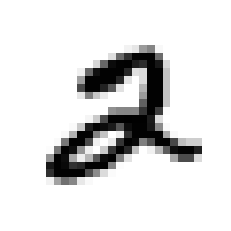

In [34]:
some_digit = X.iloc[5,:].values
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [35]:
y[5]

'2'

In [36]:
y = y.astype(np.uint8)

In [37]:
X.isnull().sum().sum() 

0

In [38]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [56]:
X_train.shape

(60000, 784)

In [52]:
# Select a digit from the dataset
some_digit = mnist.images[3]

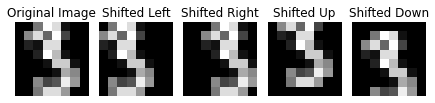

In [65]:
def shift_image_right(some_digit, pixels):
    shifted_image = shift(some_digit, (0, pixels))
    return shifted_image

def shift_image_left(some_digit, pixels):
    shifted_image = shift(some_digit, (0, -pixels))
    return shifted_image

def shift_image_up(some_digit, pixels):
    shifted_image = shift(some_digit, (-pixels, 0))
    return shifted_image

def shift_image_down(some_digit, pixels):
    shifted_image = shift(some_digit, (pixels, 0))
    return shifted_image


# Select a digit from the dataset
some_digit = mnist.images[3]

# Specify the number of pixels to shift
pixels_to_shift = 1

shifted_up_image = shift_image_up(some_digit, pixels_to_shift)
shifted_down_image = shift_image_down(some_digit, pixels_to_shift)
shifted_right_image = shift_image_right(some_digit, pixels_to_shift)
shifted_left_image = shift_image_left(some_digit, pixels_to_shift)


shift_functions = [shift_image_left, shift_image_right, shift_image_up, shift_image_down]
shifted_titles = ['Shifted Left', 'Shifted Right', 'Shifted Up', 'Shifted Down']

plt.subplot(1, len(shift_functions) + 1, 1)
plt.imshow(some_digit, cmap='gray')
plt.axis('off')
plt.title('Original Image')

for i, shift_func in enumerate(shift_functions):
    shifted_image = shift_func(some_digit, pixels_to_shift)

for i, shift_func in enumerate(shift_functions):
    shifted_image = shift_func(some_digit, pixels_to_shift)

    plt.subplot(1, len(shift_functions) + 1, i + 2)
    plt.imshow(shifted_image, cmap='gray')
    plt.axis('off')
    plt.title(shifted_titles[i])

plt.tight_layout()
plt.show()    

In [46]:
expanded_X_train = []
expanded_y_train = []


In [64]:


for image, label in zip(X_train, y_train):
    # Add the original image and label to the expanded training set
    expanded_X_train.append(image)
    expanded_y_train.append(label)

    # Shift the image left
    shifted_left = shift_image_left(image, 1)
    expanded_X_train.append(shifted_left)
    expanded_y_train.append(label)

    # Shift the image right
    shifted_right = shift_image_right(image, 1)
    expanded_X_train.append(shifted_right)
    expanded_y_train.append(label)

    # Shift the image up
    shifted_up = shift_image_up(image, 1)
    expanded_X_train.append(shifted_up)
    expanded_y_train.append(label)

    # Shift the image down
    shifted_down = shift_image_down(image, 1)
    expanded_X_train.append(shifted_down)
    expanded_y_train.append(label)





RuntimeError: input and output rank must be > 0

In [58]:
expanded_X_train = np.array(expanded_X_train)
expanded_y_train = np.array(expanded_y_train)


In [59]:
print("Expanded training set shape:", expanded_X_train.shape)


Expanded training set shape: (0,)
